# Canny Edge Detector
$p.30 \sim p.53$

1. Gaussian filter
2. Find the intensity gradient of the image

  a. Apply a pair of convolution masks

  ![](https://i.imgur.com/EiYaObX.png)

  b. Find the gradient strength and direction with:

  ![](https://i.imgur.com/U5FEiKe.png)

3. Non-maximum Suppression
4. Thresholding edges
5. Hysteresis: The final step. Canny does use two thresholds (upper and lower):
>If a pixel gradient is higher than the upper threshold, the pixel is accepted as an edge
If a pixel gradient value is below the lower threshold, then it is rejected.
If the pixel gradient is between the two thresholds, then it will be accepted only if it is connected to a pixel that is above the upper threshold.
Canny recommended a upper:lower ratio between 2:1 and 3:1.

[Canny Edge Detector](https://docs.opencv.org/master/da/d5c/tutorial_canny_detector.html)

In [1]:
from google.colab import drive
import os
drive.mount('/content/drive')
os.chdir('/content/drive/MyDrive/master1_class/image_process_class/HW/class')

Mounted at /content/drive


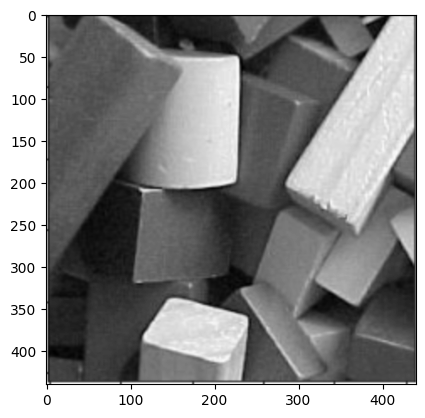

image.shape:  (440, 440)
image type:  uint8


In [6]:
import cv2
import numpy as np
import math
import matplotlib.pyplot as plt

img_org = cv2.imread("blocks.jpg",0)
plt.imshow(img_org ,cmap='gray')
plt.show()
print('image.shape: ', img_org.shape)
print('image type: ', img_org.dtype)
img_org = img_org.astype('int32')


## Step 1. Gaussian filter

original shape:  (440, 440)
gaussian shape:  (440, 440)


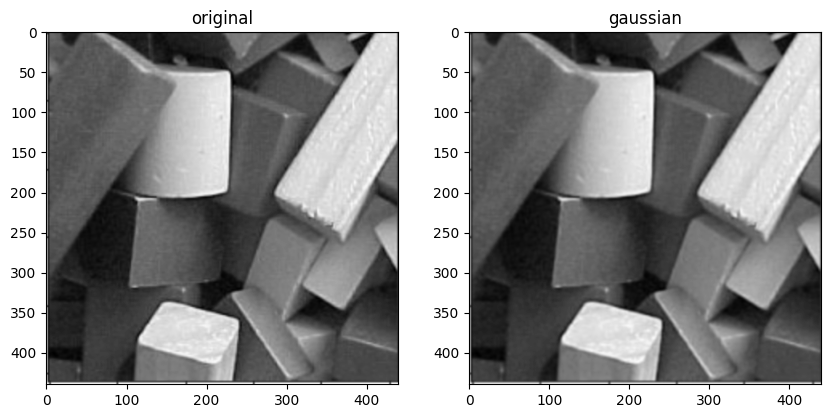

In [7]:
def padding_img(img,k_size,style='edge'):
  # ------------ To do ------------- #
  if k_size <= 0:
    raise ValueError("Padding size should be a positive integer.")
  if len(img.shape) == 2: # Grayscale image(N*M)2D
    padded_img = np.pad(img, pad_width = k_size, mode = style)
  elif len(img.shape) == 3: # RGB image(N*M*C)3D
    padded_img = np.pad(img, ((k_size,k_size), (k_size,k_size), (0,0)), mode = style)
  else:
    raise ValueError("Input image should be either grayscale or RGB.")
  return padded_img

def gaussian_kernel(size):
  # ------------ To do ------------- #
  sigma = 0.3 * ((size - 1) * 0.5 - 1) + 0.8
  Gaussian=[]
  #各係數相加後總值
  total=0
  for i in range(0,size):
      Filter_list = []
      for j in range(0,size):
          #高斯函數公式
          # -------------- To do ----------------- #
          x, y = i - (size - 1) / 2, j - (size - 1) / 2  #相對中心點的位移
          weight = 1 / (2 * np.pi * sigma ** 2) * np.exp(-(x ** 2 + y ** 2) / (2 * sigma ** 2)) #公式
          Filter_list.append(weight)
          total += weight
      Gaussian += [Filter_list]

  return np.array(Gaussian)/total

KernelSize = 3
def Gaussian_Filter(KernelSize,image):
    row,col =image.shape
    Gaussian_Kernel = gaussian_kernel(KernelSize)

    resx=np.zeros((row,col),np.uint8)
    padimg = padding_img(image,(KernelSize-1)//2,style = 'reflect')

    # ------------ To do ------------- #
    for i in range(0, row):
      for j in range(0, col):
        padimg_fos = padimg[i : i + KernelSize, j : j + KernelSize]
        resx[i, j] = np.sum(np.multiply(padimg_fos,Gaussian_Kernel))

    return resx

img_gaussian = Gaussian_Filter(KernelSize, img_org)
print("original shape: ", img_org.shape)
print("gaussian shape: ", img_gaussian.shape)

plt.figure(figsize=(10, 20))
plt.subplot(1, 2, 1)
plt.imshow(img_org, cmap = 'gray')
plt.title("original")
plt.subplot(1, 2, 2)
plt.imshow(img_gaussian ,cmap = 'gray')
plt.title("gaussian")
plt.show()

## Step 2. Filter image with derivative of Gaussian
![](https://i.imgur.com/G4e6Z4n.png)

In [8]:
def sobel(img, filtering_type):
    h, w = img.shape
    print(h, w)
    horizontal = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
    vertical = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])

    Gx = np.zeros((h - 2, w - 2))
    Gy = np.zeros((h - 2, w - 2))

    # ------------ To do ------------- #
    k = iterate_regions(img, 3)
    for fos_img, i, j in (k):
        Gx[i, j] = np.sum(np.multiply(horizontal, fos_img))
        Gy[i, j] = np.sum(np.multiply(vertical, fos_img))
    angle = np.arctan2(Gy, Gx)
    if (filtering_type == 'hor'):
        output = abs(Gx)
    elif (filtering_type == 'ver'):
        output = abs(Gy)
    elif (filtering_type == 'mag'):
        output = np.hypot(Gx, Gy)
    #print(angle)
    return np.clip(output, 0, 255), angle


def iterate_regions(img, kernel_size):
    h, w = img.shape
    for i in range(h - kernel_size + 1):
        for j in range(w - kernel_size + 1):
            img_region = img[i:(i + kernel_size), j:(j + kernel_size)]
            yield img_region, i, j



442 442
442 442
442 442
Gaussian shape:  (440, 440)
Horizontal Sobel filter shape:  (440, 440)
Vertical Sobel filter shape:  (440, 440)
Gradient amplitude shape:  (440, 440)


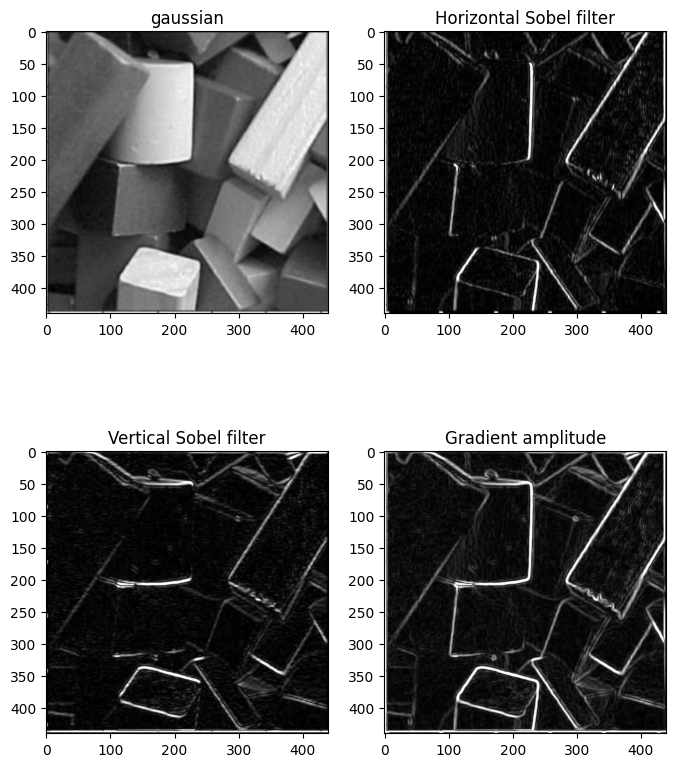

In [9]:
# ------------ To do ------------- #
padimg = padding_img(img_gaussian, 1,style = 'reflect')

img_sb_x, angle_x = sobel(padimg, 'hor')
img_sb_y, angle_y = sobel(padimg, 'ver')
img_sb, angle = sobel(padimg, 'mag')

print("Gaussian shape: ", img_gaussian.shape)
print("Horizontal Sobel filter shape: ", img_sb_x.shape)
print("Vertical Sobel filter shape: ", img_sb_y.shape)
print("Gradient amplitude shape: ", img_sb.shape)

plt.figure(figsize=(8, 10))
plt.subplot(2, 2, 1)
plt.imshow(img_gaussian, cmap = 'gray')
plt.title('gaussian')
plt.subplot(2, 2, 2)
plt.imshow(img_sb_x ,cmap = 'gray')
plt.title('Horizontal Sobel filter')
plt.subplot(2, 2, 3)
plt.imshow(img_sb_y ,cmap = 'gray')
plt.title('Vertical Sobel filter')
plt.subplot(2, 2, 4)
plt.imshow(img_sb ,cmap = 'gray')
plt.title('Gradient amplitude')
plt.show()

## Step 3. Non-maximum Suppression
Non maximum suppression without interpolation requires us to divide the 3x3 grid of pixels into 8 sections. Ie. if the gradient direction falls in between the angle -22.5 and 22.5, then we use the pixels that fall between this angle (r and q) as the value to compare with pixel p, see image below.

![](https://i.imgur.com/55DLrWn.png)

In [17]:
def non_maximum_suppression(gradient,angle):
    gradient_copy = gradient.copy()
    height,width= gradient.shape
    angle = angle * 180 / np.pi
    for j in range(1, height-1):
        for i in range(1, width-1):
            # ------------ To do ------------- #
            if(-22.5 <= angle[j, i] < 0  or 0 <= angle[j, i] < 22.5):
              q = gradient[j, i-1]
              r = gradient[j, i+1]
            elif(22.5 <= angle[j,i] < 67.5):
              q = gradient[j-1, i-1]
              r = gradient[j+1, i+1]
            elif(67.5 <= angle[j,i] < 112.5):
              q = gradient[j-1, i]
              r = gradient[j+1, i]
            elif(112.5 <= angle[j,i] < 157.5):
              q = gradient[j-1, i+1]
              r = gradient[j+1, i-1]
            elif(157.5 <= angle[j,i] < 180 or -180 <= angle[j,i] < -157.5):
              q = gradient[j, i+1]
              r = gradient[j, i-1]
            elif(-157.5 <= angle[j,i] < -112.5):
              q = gradient[j+1, i+1]
              r = gradient[j-1, i-1]
            elif(-112.5 <= angle[j,i] < -67.5):
              q = gradient[j+1, i]
              r = gradient[j-1, i]
            elif(-67.5 <= angle[j,i] < -22.5):
              q = gradient[j-1, i+1]
              r = gradient[j+1, i-1]

            if(gradient[j, i] < q or gradient[j, i] < r):
              gradient_copy[j, i] = 0

    return np.clip(gradient_copy, 0, 255)

gradient, angle = sobel(img_gaussian, 'mag')
After_non_maximum_supression = non_maximum_suppression(gradient,angle)


440 440


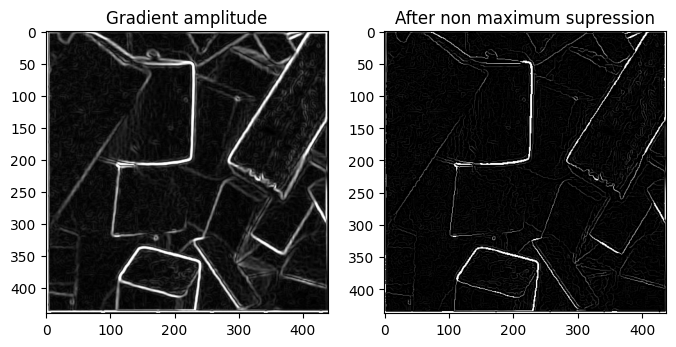

In [18]:
# ------------ To do ------------- #
plt.figure(figsize = (8, 10))

plt.subplot(1, 2, 1)
plt.title('Gradient amplitude')
plt.imshow(img_sb, cmap = 'gray')

plt.subplot(1, 2, 2)
plt.title('After non maximum supression')
plt.imshow(After_non_maximum_supression, cmap = 'gray')

## Step 4. Thresholding edges

In [19]:
def seperate(img, minimum = 60, maximum = 180):
    # ------------ To do ------------- #
    row, col = img.shape

    thr = np.zeros((row, col))
    for i in range(0, row):
      for j in range(0, col):
        if img[i, j] >= maximum:
          thr[i, j] = 255
        elif img[i, j] >= minimum and img[i, j] < maximum:
          thr[i, j] = 125 #講義上要125
        elif img[i, j] < minimum:
          thr[i, j] = 0
    return np.clip(thr, 0, 255)


thresholding = seperate(After_non_maximum_supression, minimum = 15, maximum = 90)

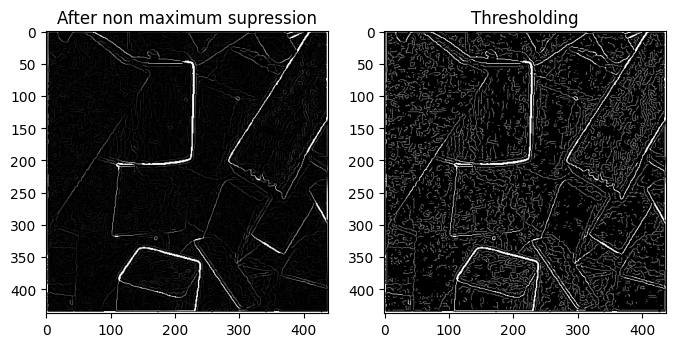

In [14]:
# ------------ To do ------------- #
plt.figure(figsize = (8, 10))

plt.subplot(1, 2, 1)
plt.title('After non maximum supression')
plt.imshow(After_non_maximum_supression ,cmap = 'gray')

plt.subplot(1, 2, 2)
plt.title('Thresholding')
plt.imshow(thresholding ,cmap = 'gray')
plt.show()

## Step 5. Hysteresis

In [20]:
def Connect(img, weak = 60):
  # ------------ To do ------------- #
  row, col = img.shape
  hys = img.copy()
  for i in range(1, row - 1):
    for j in range(1, col - 1):
      if img[i, j] == weak:
        if(img[i, j + 1] == 255 or img[i, j - 1] == 255 or
        img[i + 1, j] == 255 or img[i - 1, j] == 255 or
        img[i + 1, j + 1] == 255 or img[i - 1, j - 1] == 255 or
        img[i - 1, j + 1] == 255 or img[i + 1, j - 1] == 255):
          hys[i, j] = 255

        else:
          hys[i, j] = 0
  output = hys

  return output

dst_img = Connect(thresholding,125)


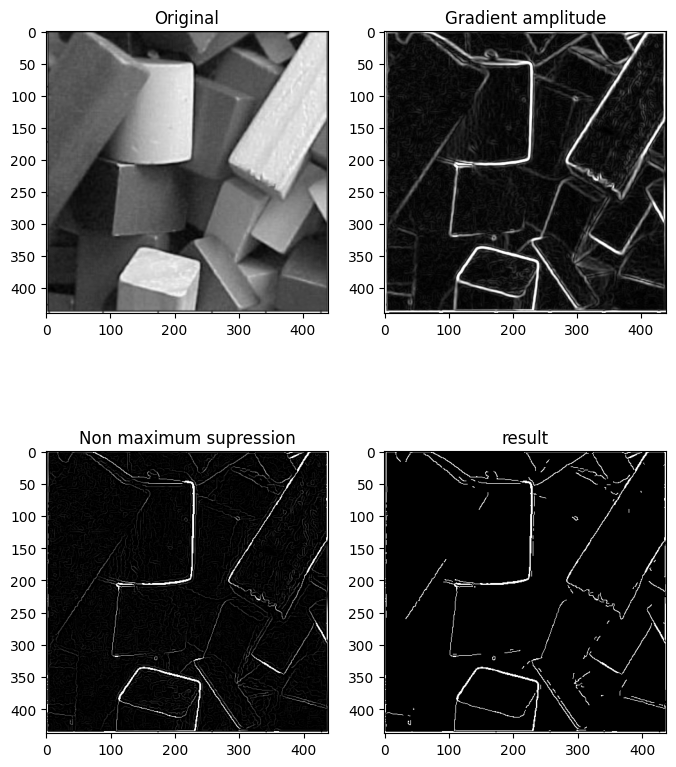

In [21]:
# ------------ To do ------------- #
plt.figure(figsize = (8, 10))

plt.subplot(2, 2, 1)
plt.title('Original')
plt.imshow(img_org, cmap = 'gray')

plt.subplot(2, 2, 2)
plt.title('Gradient amplitude')
plt.imshow(img_sb ,cmap = 'gray')


plt.subplot(2, 2, 3)
plt.title('Non maximum supression')
plt.imshow(After_non_maximum_supression ,cmap = 'gray')


plt.subplot(2, 2, 4)
plt.title('result')
plt.imshow(dst_img ,cmap = 'gray')

plt.show()

## Canny Edge OpenCV 套件


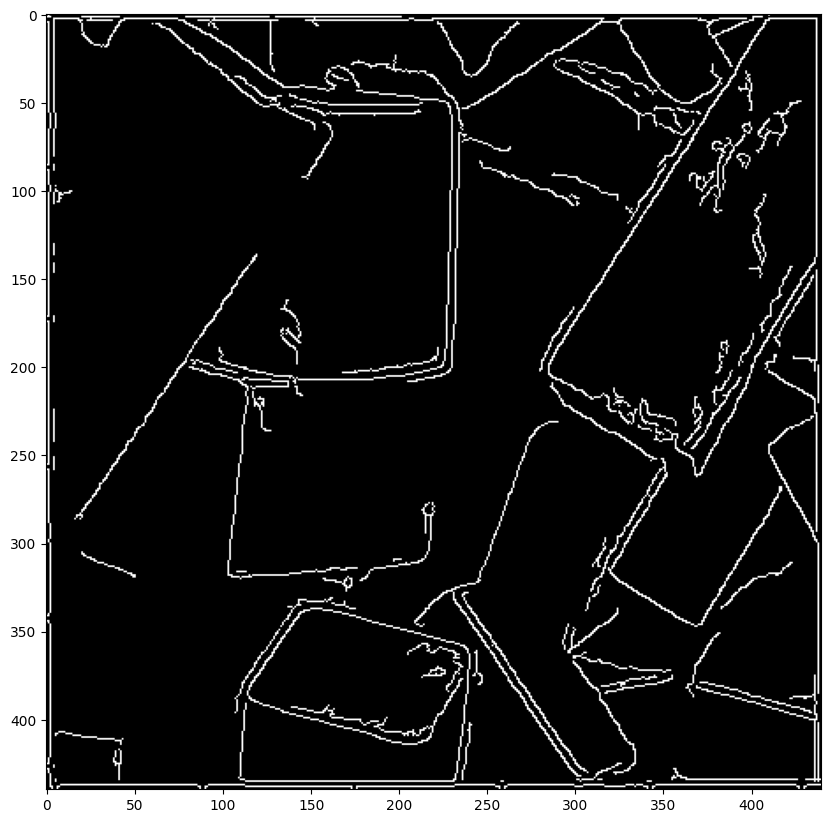

In [22]:
low_threshold = 15
high_threshold = 90
kernel_size = 3
#這邊較低的threshold用於檢測圖像中明顯的邊緣，較高的threshold則將間斷的邊緣連接起來。
plt.figure(figsize=(10,18))
img2 = cv2.imread("blocks.jpg",0)
gray_blur = cv2.GaussianBlur(img2,(kernel_size, kernel_size),0)
edges = cv2.Canny(gray_blur, low_threshold, high_threshold)
plt.imshow(edges, cmap='gray')
plt.show()

## 加分討論：為什麼和套件不一樣？

可能跟許多細節的參數有關，像是在高斯模糊的步驟就可能因為標準差設定、padding方式等等設定不同而導致結果不同，甚至後面的步驟也都有些微差距，許多的細微差距導致最後結果有所不同。

# 加分題目 : Dilation (膨脹) & Erosion (侵蝕)

## Dilation (膨脹)

In [ ]:
def Dilation(img, kernel):
  row, col = img.shape
  dilation_img = np.zeros((row, col))
  kernelsize = kernel.shape[0]
  img = padding_img(img, (kernelsize-1)//2, channel = 1)

  # -------- To do ------------- #

  # ------------------------------- #
  return dilation_img

res = Dilation(image, get_kernel('dilation', kernel_size = 3))

plt.figure(figsize=(10,20))
plt.subplot(1,2,1)
plt.title('original')
plt.imshow(image, cmap = 'gray')
plt.subplot(1,2,2)
plt.title('dilation')
plt.imshow(res, cmap = 'gray')
plt.show()

print('original shape: ', image.shape)
print('dilation shape: ', res.shape)

NameError: ignored

## Erosion (侵蝕)

In [ ]:
def Erosion(img, kernel):
  row, col = img.shape
  erosion_img = np.zeros((row, col))
  kernelsize = kernel.shape[0]
  img = padding_img(img, (kernelsize-1)//2, channel = 1)

  # -------- To do ------------- #

  # ------------------------------- #
  return erosion_img

res = Erosion(image, get_kernel('erosion', kernel_size = 3))

plt.figure(figsize=(10,20))
plt.subplot(1,2,1)
plt.title('original')
plt.imshow(image, cmap = 'gray')
plt.subplot(1,2,2)
plt.title('erosion')
plt.imshow(res, cmap = 'gray')
plt.show()

print('original shape: ', image.shape)
print('erosion shape: ', res.shape)